# K-means Clustering Project on Marketing Data 

In [1]:
import numpy as np
import pandas as pd

In [2]:
mall =  pd.read_csv("E:\Imarticisans\data file\mall_kmeans.csv")

In [3]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
mall.columns[ mall.dtypes == 'object']

Index(['Genre'], dtype='object')

In [5]:
mall.Genre.fillna( "Male" , inplace = True)
mall.Genre.replace( {'Female' : 0 , "Male" :1} , inplace = True)

In [6]:
mall = mall.drop([ "CustomerID"] , axis = 1)

In [7]:
from sklearn.cluster import KMeans
KMeans_mall = KMeans(n_clusters = 3)

In [8]:
KMeans_mall.fit(mall)

KMeans(n_clusters=3)

In [9]:
KMeans_mall.score(mall)  # We got the value of SSD ( Sum square difference for 3 clusters)

-143391.5923603567

In [10]:
KMeans_mall.labels_  # labeled data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [11]:
KMeans_mall.cluster_centers_   # For 3 clusters, we have 4 different value as we have 4 variables in our dataset. 

array([[ 0.52631579, 40.39473684, 87.        , 18.63157895],
       [ 0.40650407, 40.32520325, 44.15447154, 49.82926829],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513]])

In [12]:
mall_datafame = pd.DataFrame( KMeans_mall.cluster_centers_ )
mall_datafame  # converted into dataframe for better understanding.

,0,1,2,3
0,0.526316,40.394737,87.000000,18.631579
1,0.406504,40.325203,44.154472,49.829268
2,0.461538,32.692308,86.538462,82.128205


In [13]:
list = []
i = 1
for i in range ( 1 ,  11):
    KMeans_mall = KMeans ( n_clusters= i )
    KMeans_mall.fit(mall)   
    scm = KMeans_mall.score(mall)  # Ignore the -ve sign as it is Sum square difference.     
    scm =np.round(np.abs(scm))  # taking absolute will make the values +ve
    list.append(scm)
print('Scm --->>' , list)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Scm --->> [308862.0, 212889.0, 143392.0, 104415.0, 75400.0, 58351.0, 51133.0, 44392.0, 41068.0, 37172.0]


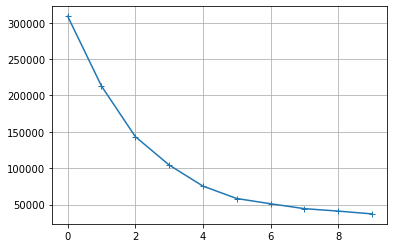

In [15]:
import matplotlib.pyplot as plt

plt.plot(list , marker = "+" )
plt.grid()

In [16]:
# Taking the value where there is a sudden decay and stabalized later. 

# Value of K is to be considered as 5 .

# Building the kmeans model again using value of K as 5. 

In [17]:
KMeans_mall = KMeans ( n_clusters= 5 )
KMeans_mall.fit(mall)

KMeans(n_clusters=5)

In [18]:
KMeans_mall.score(mall)  # SSD score seems to be good than the previous on. 

# previously it was  " -143391.5923603567 " . 

-75542.77371510214

In [19]:
mall_with_label = pd.concat([ mall , pd.Series( KMeans_mall.labels_) ], axis = 1)
mall_with_label   # concatinating the label actual data. 

,Genre,Age,Annual Income (k$),Spending Score (1-100),0
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,1
197,1,32,126,74,0
198,1,32,137,18,1


In [20]:
mall_with_label.rename( columns= {mall_with_label.columns[-1] : 'Label'} , inplace = True)
mall_with_label.head()  # Renamed the columns name as Label.  


# Label added at the end will help understading which person belongs to which cluster where 1 , 2 ,3 , 4, 5 . 

,Genre,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3
